# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [2]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#load and inspect the data
df = pd.read_csv("reg_data.csv")
df


,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [4]:
assert df.shape == (100,2)

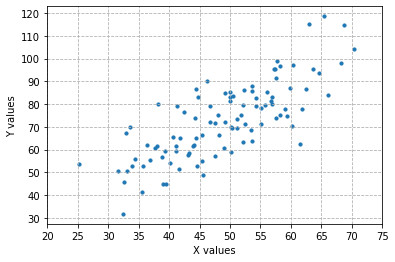

In [19]:
#plot the data (scatter)
plt.scatter(df.X, df.Y, s=10)

plt.xlabel("X values")
plt.ylabel("Y values")

plt.xticks(np.arange(20, 80, step=5))
plt.yticks(np.arange(30, 130, step=10))
plt.grid(linestyle="dashed")

plt.show()

This data has a linear positive correlation

In [37]:
# Split train and test data 80/20

x_train, x_test, y_train, y_test = train_test_split(df.X, df.Y, train_size=0.8, random_state=0)

In [38]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [47]:
#implement a least squares function to find a, b

x_mean = x_train.mean()
y_mean = y_train.mean()

b_upper = 0
b_lower = 0

for i in range(len(x_train)):
    b_upper += (x_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    b_lower += (x_train.values[i] - x_mean) ** 2
b = b_upper / b_lower
a = y_mean - b * x_mean


# print(x_mean)
# print(y_mean)
# print(b_upper)
# print(b_lower)
print(f"The gradient of the best fit line is {b}")
print(f"The y-intercept of the best fit line is {a}")

The gradient of the best fit line is 1.3450919020620415
The y-intercept of the best fit line is 6.687439682550206


In [48]:
assert abs(a - 6.68) <=0.03
assert abs(b - 1.34) <=0.03

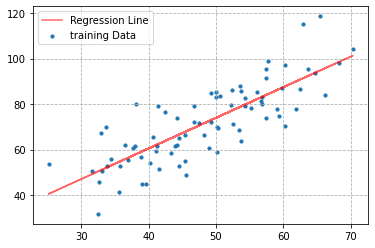

-0.9672846112636684


In [104]:
y_train_pred = a + b * x_train

plt.plot(x_train, y_train_pred, color="r", label="Regression Line", alpha=0.6)
plt.scatter(x_train, y_train, s=10, label="training Data")

plt.legend()
plt.grid(linestyle="dashed")

plt.show()
print(a + 3*b - 11.69)

In [97]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [100]:
#Separate your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []

for i in range(len(x_test)):
    if y_test.values[i] < (a + b * x_test.values[i]):
        class_0.append((x_test.values[i], y_test.values[i]))
    else:
        class_1.append((x_test.values[i], y_test.values[i]))

        
class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [101]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

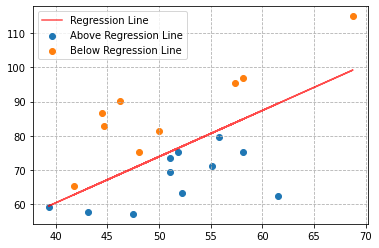

In [137]:
# print(class_0)
# print(class_0[0:,0])
# print(class_0[0:, 1])
# data[row , column], in this data there are only 2 columns, the 0 index column being the x values and the 1 index being the y values
# as such, we use 0 for getting the x values and 1 for the y values.
# data[start : End : Step], we start at 0 index to the end and default step is 1
y_test_pred = a+b*x_test

plt.scatter(class_0[0:, 0], class_0[0:, 1], label="Above Regression Line")
plt.scatter(class_1[0:, 0], class_1[0:, 1], label="Below Regression Line")
plt.plot(x_test, y_test_pred, label="Regression Line", color="red", alpha=0.7)

plt.grid(linestyle="dashed")
plt.legend()

plt.show()

In [138]:
# get the total error for the classes

err = 0
for i in range(len(x_test)):
    err += abs(y_test.values[i] - y_test_pred.values[i])

err

201.82447860643398

In [139]:
assert err - 201 < 20